In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()  #加载鸢尾花数据

# 数据探索及预处理

In [3]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['label'] = iris.target  #添加数据标签
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


为了可视化顺利，仅选择鸢尾花sepal length及sepal width两个属性。即数据是在二维平面

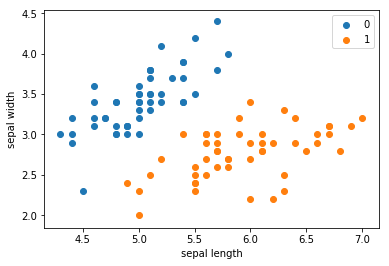

In [4]:
plt.scatter(iris_data[:50]['sepal length (cm)'], iris_data[:50]['sepal width (cm)'], label='0')
plt.scatter(iris_data[50:100]['sepal length (cm)'], iris_data[50:100]['sepal width (cm)'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [5]:
data = iris_data.iloc[:100,[0,1,-1]]  #取前100条数据（前50条数据类别为0、后50条数据类别为1）的sepal length和sepal width及标签
data.head()
data.describe()

,sepal length (cm),sepal width (cm),label
count,100.000000,100.000000,100.000000
mean,5.471000,3.094000,0.500000
std,0.641698,0.476057,0.502519
min,4.300000,2.000000,0.000000
25%,5.000000,2.800000,0.000000
50%,5.400000,3.050000,0.500000
75%,5.900000,3.400000,1.000000
max,7.000000,4.400000,1.000000


In [6]:
data = np.array(data)
X, y = data[:,:-1], data[:,-1]

要对标签进行处理。标签只有1和-1两类，而不是1和0！
如果忘记这一步，后面的梯度下降更新会出问题

In [7]:
y = np.array([1 if i == 1 else -1 for i in y])  #将标签由0变为-1
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


## 定义感知机模型及训练

In [8]:
class Perceptron(object):
    def __init__(self, max_iter=1000):
        self.lr = 0.1
        self.w = np.zeros(len(np.array(data)[0])-1,dtype=np.float32)
        self.b = 0
        self.max_iter = max_iter
        
    def fit(self, X_train, y_train):
        is_wrong = True
        iteration = 0
        while is_wrong and (iteration < self.max_iter):  
            error_count = 0
            #梯度下降更新
            for i in range(len(X_train)):
                pred = 1 if (np.dot(self.w, X_train[i]) + self.b) > 0 else -1  #这里是-1而不是0
                if pred != y_train[i]: #分类错误
                    self.w += self.lr * y_train[i] * X_train[i]
                    self.b += self.lr * y_train[i]
                    error_count += 1
            #结束条件
            if error_count == 0:
                is_wrong = False
            iteration += 1
            if iteration%1000 == 0:
                print(iteration)
        print("Fit completed!")

    def predict(self, X_test):
        y_pred = []
        for i in range(len(X_test)):
            pred = 1 if (np.dot(self.w, X_test[i]) + self.b) > 0 else 0
            y_pred.append(pred)
        return y_pred

In [9]:
perceptron = Perceptron()
perceptron.fit(X, y)

Fit completed!


In [10]:
#生成X和Y来画出超平面（直线）
point_x = np.linspace(4,7,100)  #4为sepal_length最小值的向下取整，7是最大值。
point_y = -1 * ((perceptron.w[0] * point_x) + perceptron.b) / perceptron.w[1]  

## 将得到的超平面结果可视化

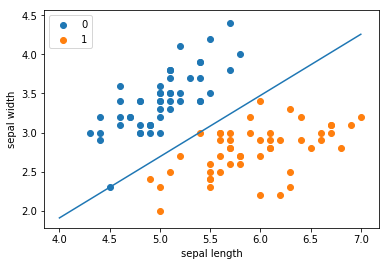

In [11]:
# 画出超平面
plt.plot(point_x,point_y)
plt.scatter(iris_data[:50]['sepal length (cm)'], iris_data[:50]['sepal width (cm)'], label='0')
plt.scatter(iris_data[50:100]['sepal length (cm)'], iris_data[50:100]['sepal width (cm)'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# 使用sklearn中的Perceptron

In [12]:
from sklearn import linear_model

In [13]:
sk_perceptron = linear_model.Perceptron(max_iter=1000)
sk_perceptron.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [14]:
print(sk_perceptron.coef_)  #模型参数w
print(sk_perceptron.intercept_)  #模型参数b

[[ 67.2 -85.6]]
[-106.]


In [15]:
#生成X和Y来画出超平面（直线）
point_x_ = np.linspace(4,7,100)  #4为sepal_length最小值的向下取整，7是最大值。
point_y_ = -1 * ((sk_perceptron.coef_[0][0] * point_x) + sk_perceptron.intercept_[0]) / sk_perceptron.coef_[0][1]

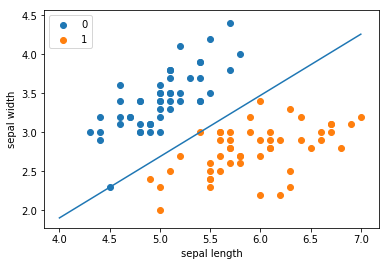

In [16]:
# 画出超平面
plt.plot(point_x_,point_y_)
plt.scatter(iris_data[:50]['sepal length (cm)'], iris_data[:50]['sepal width (cm)'], label='0')
plt.scatter(iris_data[50:100]['sepal length (cm)'], iris_data[50:100]['sepal width (cm)'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

和上面得到的超平面是一样的